# ENPH/PHYS 344 Queen's University #


## Numerical Methods Demonstration: Simple Harmonic Oscillator Spectrum by Finite Differences ##

### Prepared by Greg van Anders, CC-BY ###


The following code was used to plot the wavefunctions given the potential energy, where U0 and eps_s were changed, based on required values for the analysis.

In [1]:
import numpy as np
import math as m
from numpy import linalg as LA
import matplotlib.pyplot as plt

In [7]:
U0 = 1
eps_s = 3
def U(z) :
    if z < -my_L:
        r = 0
    elif -my_L<z<0:
        r = -U0
    elif 0<z<my_L:
        r = -U0+eps_s
    elif z > -my_L:
        r = 0
    return r

In [8]:
def U_mn(row,col) :
    ret = 0.0
    if (row == col) :
        ret += U(_z[row])
    return ret

def K_mn(row,col,N,L) :
    # N and L describe the approximation, the -0.5 is a prefactor in the Hamiltonian
    fac = -0.5*N**2/L**2
    
    # Note: This is a bit sloppy about what happens at the ends, -L/2 and L/2.
    # I'm going to use this sloppy form because it makes the Hamiltonian real symmetric,
    # so the eigenvalues are real. It is also going to turn out that our wave functions
    # go to zero at the ends, so what happens there doesn't matter very much.
    if (row==col) :
        return -2*fac
    elif (row==col-1) :
        return fac
    elif (row==col+1) :
        return fac
    else:
        return 0.0

Now we will apply this to our problem. We are going to pick a specific value for $L$ (`my_L` below) and $N$ (`my_N` below). We will also make the points `_z`. Then we will construct the Hamiltonian matrix `H`, and we'll use our matrix element functions `U_mn` and `K_mn` to make the potential energy `_U` and kinetic energy `_K` contributions to the Hamiltonian matrix.

In [9]:
my_L = 15.0 # this is units of the characteristic length \ell. I.e. 12.0 is $L=12.0\ell$
my_N = 1001 # this is the number of points in the discretization. 

_z = np.linspace(-my_L/2,my_L/2,my_N)

H = np.zeros((my_N,my_N)) # Empty matrices that will hold the Hamiltonian, and the kinetic/potential energy
_U = np.zeros((my_N,my_N))
_K = np.zeros((my_N,my_N))

# Fill in the potential and kinetic energies
for row in range(my_N) :
    for col in range(my_N) :
        _U[row,col] = U_mn(row,col)
        _K[row,col] = K_mn(row,col,my_N,my_L)
        
# add up the contributions to get the Hamiltonian        
H = _K+_U


Now that we have the Hamiltonian matrix, we can compute the eigenvalues and eigenvectors (we will use the `numpy.linalg` function `eig`). We are interested in the first few eigenvalues (the lowest energies), and the associated eigenvectors (the wave functions). Let's get the energies and plot the probability distributions associated with each of the wave functions.

[-0.92132818 -0.68576638 -0.29485121  0.24806425  0.93526169  1.73902363
  2.08935584  2.33023882]


Text(0.5, 0, '$z$')

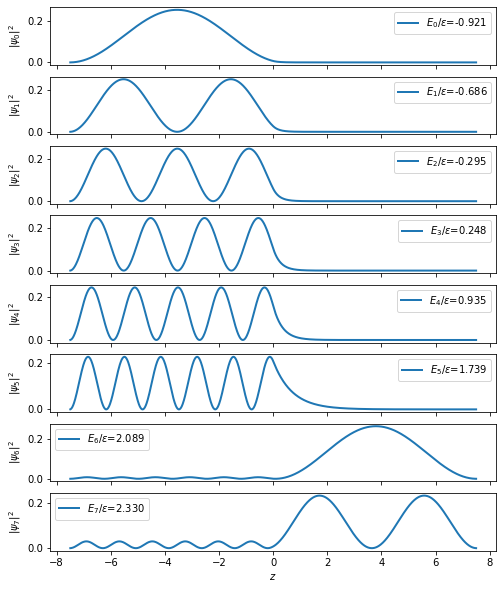

In [10]:
(vals,vects) = LA.eig(H)

idx = vals.argsort() # this gets the indices of the eigenvalues in ascending order
idx = idx[0: 8] # this takes the first six

Energies = vals[idx] # get the energies, they are in units of $\epsilon=\hbar\omega$
States = vects[:,idx] # get the states, the positions are in units of $\ell$
print (Energies)

fig, axs = plt.subplots(len(idx),figsize=(8,10),sharex=True)
for i in range(len(idx)) :
    y = States[:,i] # get the state
    norm = m.sqrt(my_L/my_N*np.dot(y,y)) # compute the normalization constant
    y /= norm # normalize the state
    axs[i].set_ylabel('$|\psi_{}|^2$'.format(i))
    axs[i].plot(_z,y**2,lw=2, label="$E_{}/\epsilon$={:.3f}".format(i,Energies[i]))
    axs[i].legend() # Plot the probability distribution |\psi|^2
axs[-1].set_xlabel('$z$')


Text(0, 0.5, 'Energy')

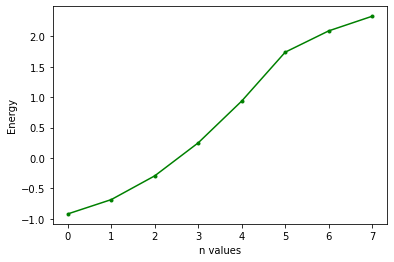

In [11]:
plt.plot(Energies, 'g.-')
plt.xlabel('n values')
plt.ylabel('Energy')